# <center>Trabajo Práctico Computacional 5:<br>Comunidades</center>

Grupo 9: Facundo Joaquı́n Garcı́a, Agustı́n Brusco, Eitan Sprejer

# Cloning Repo for Data and Imports

In [1]:
import os
directory_path = os.getcwd()
folder_name = os.path.basename(directory_path)
if folder_name == 'content':  # in default colab folder
    if 'CoNet' not in os.listdir():
        !git clone https://github.com/facundojgarcia02/CoNet.git
    os.chdir(r"/content/CoNet/TP5")


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import pandas as pd

from matplotlib import rcParams
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
rcParams['font.family'] = 'serif'
rcParams['mathtext.fontset'] = 'cm'
rcParams['figure.dpi'] = 100
rcParams['legend.fontsize'] = 10
rcParams['axes.labelsize'] = 'large'

CUSTOM_FORMAT = {"with_labels" : False,
                 "node_size": 10, "node_color": "red", "edgecolors": "black",
                 "linewidths": 0.25, "width": 0.25, "edge_color": "black"}

def custom_draw(graph, ax,
                cmap: str = 'viridis',
                size_degree: bool = False,
                **kwargs):
    k_vals = np.array([k for i, k in graph.degree()])
    norm = plt.Normalize(k_vals.min(), k_vals.max())
    colorscale = plt.cm.ScalarMappable(norm, cmap, )
    if size_degree:
        nx.draw(graph,  with_labels=False,
                node_size=10*np.log(1+k_vals/k_vals.max()) +  4,
                node_color=colorscale.to_rgba(k_vals),
                edgecolors="black", edge_color="black",
                linewidths=0.25, width=0.25,
                ax=ax, **kwargs)
    else:
        nx.draw(graph,  with_labels=False,
                node_size=10,
                node_color=colorscale.to_rgba(k_vals),
                edgecolors="black", edge_color="black",
                linewidths=0.25, width=0.25,
                ax=ax, **kwargs)
    return colorscale

# 2) Red de Coexpresión Génica

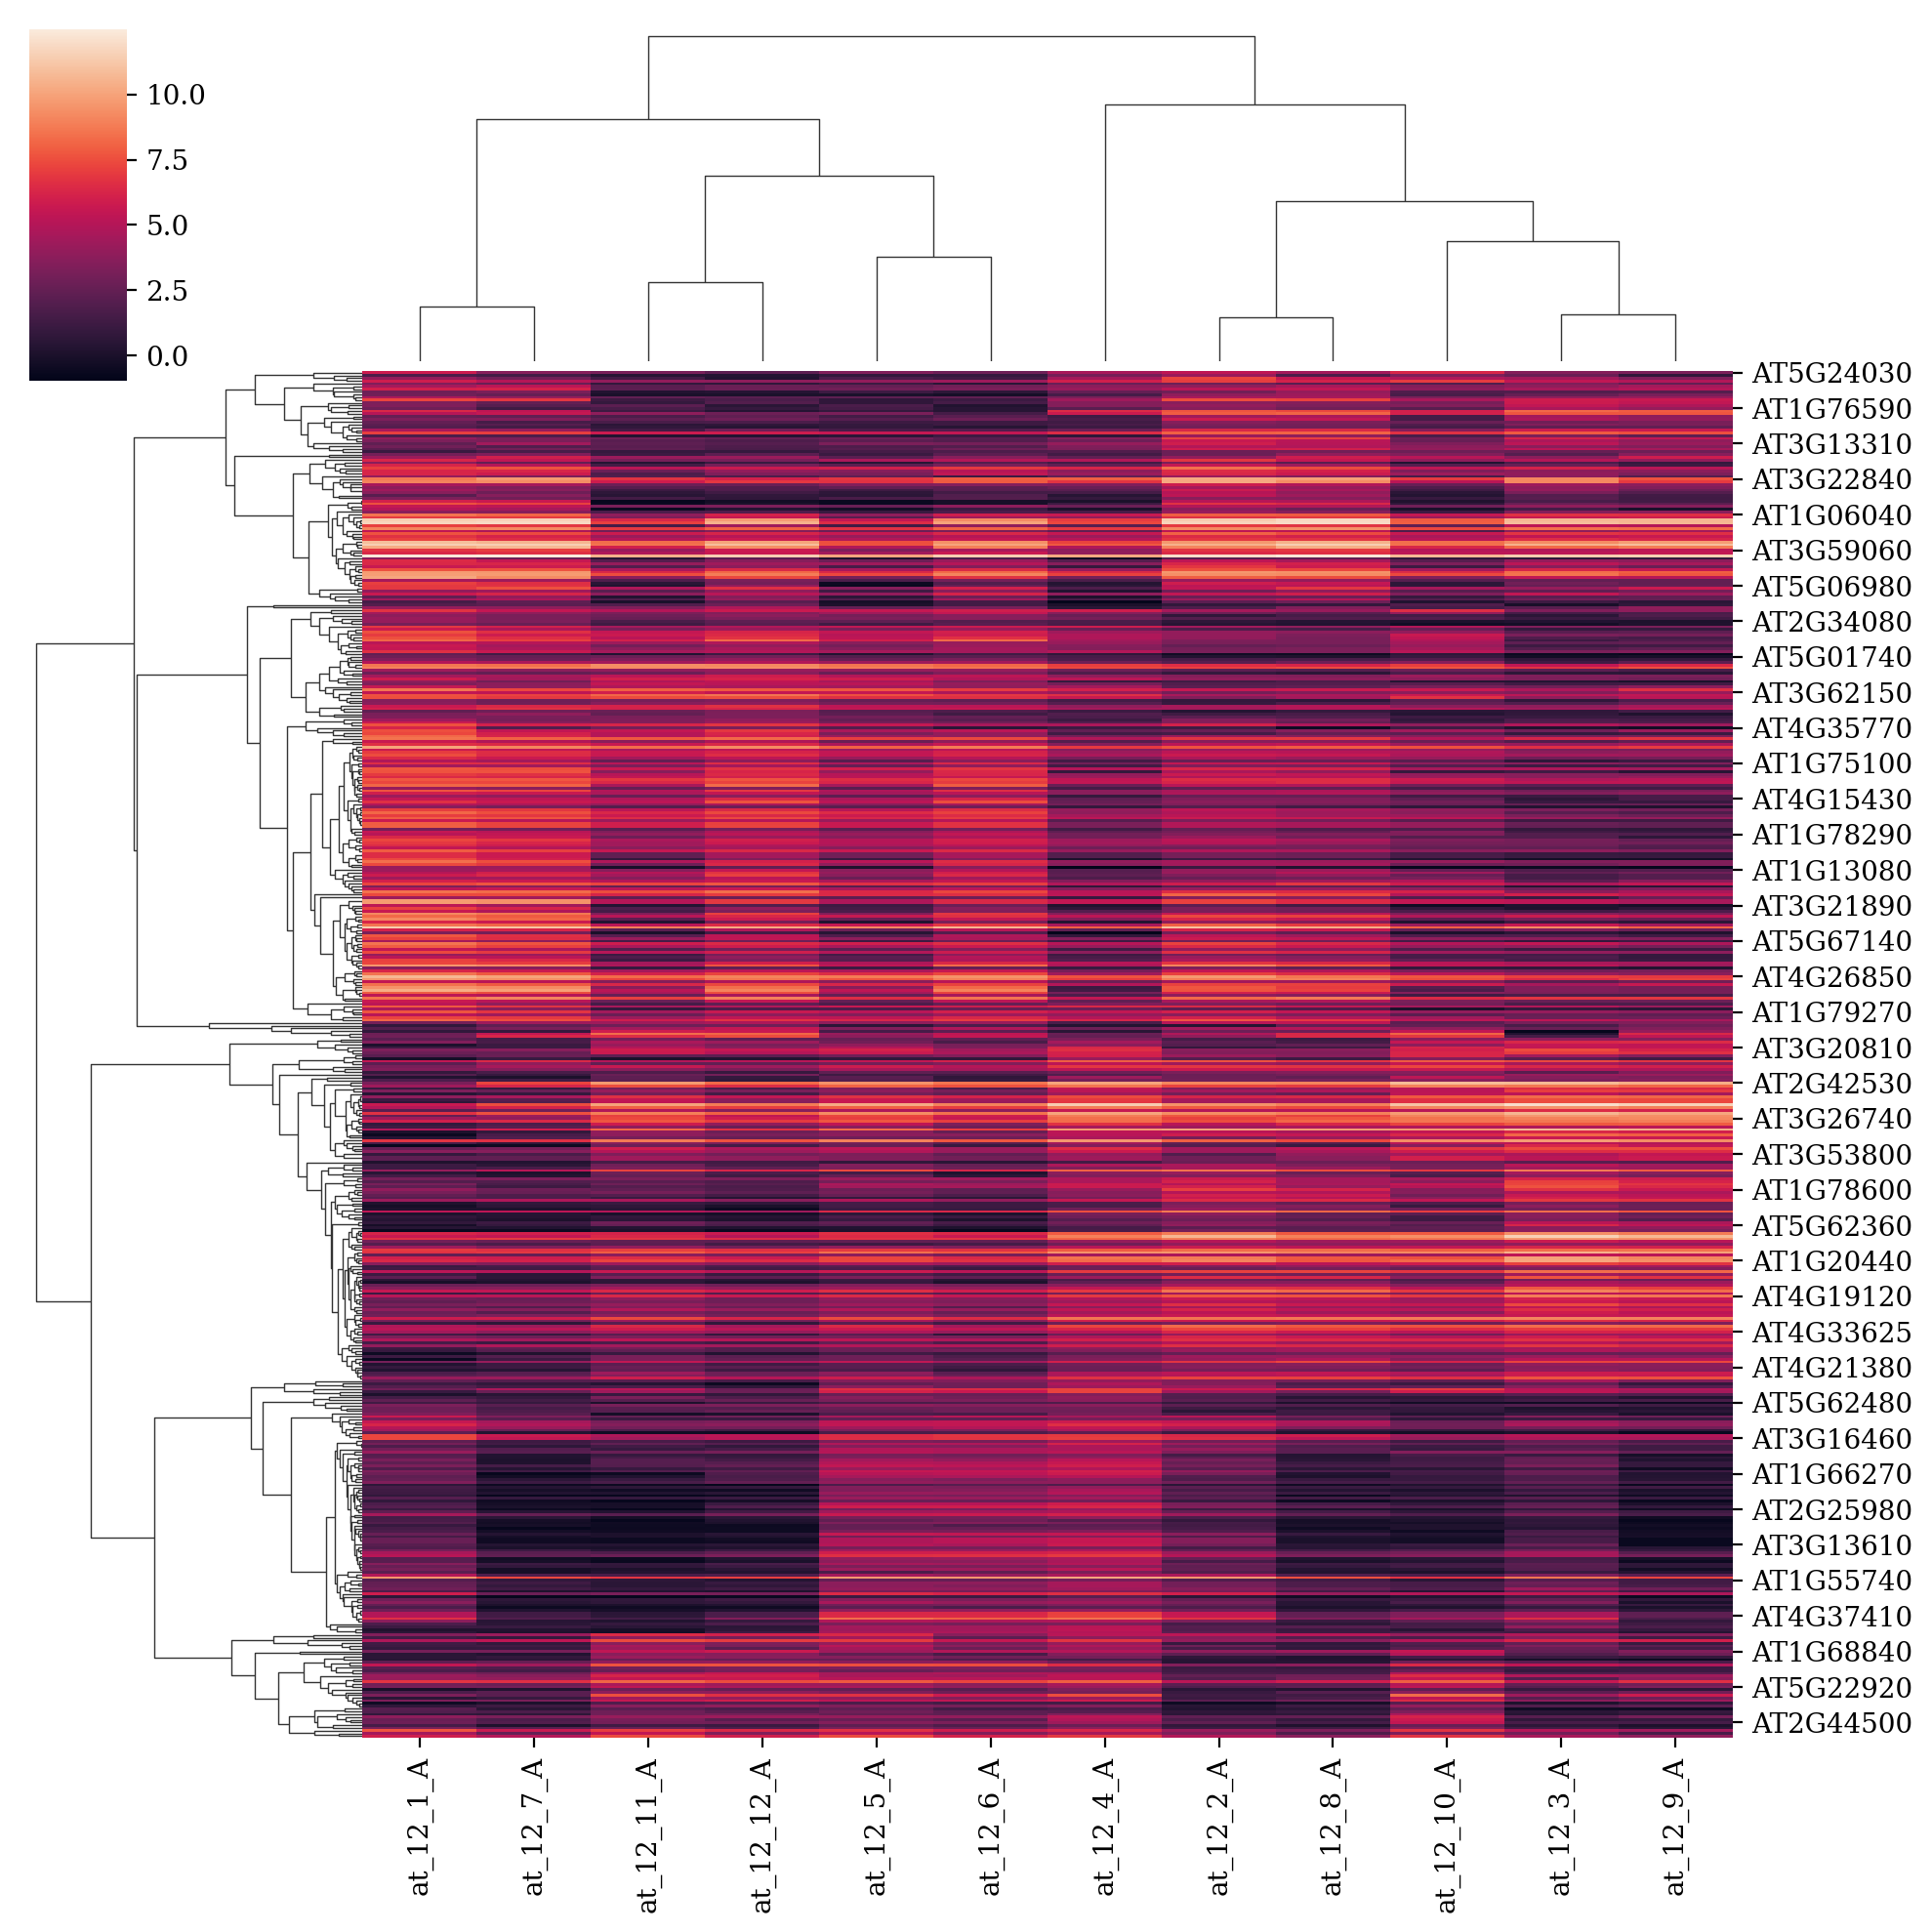

In [17]:
genex_df = pd.read_csv("datasets/geneX.csv", index_col=0)

g = sns.clustermap(genex_df, metric="correlation")
g.figure.set_facecolor('w')
plt.show()

## a) $s_{ij} = \frac{1 + cor(A_i,\ A_j)}{2}$